# import torch


In [1]:
import torchvision
import kornia
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt 

# sharp a tensor

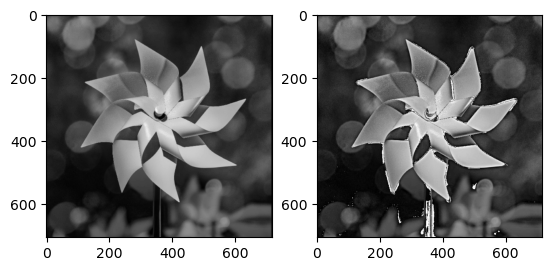

In [14]:
#read an image
image=cv2.imread("flower.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()

#unsharp mask
output = kornia.filters.unsharp_mask(tensor_image, (25, 25), (5, 5))

#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur,cmap='gray')

# Laplacian filter

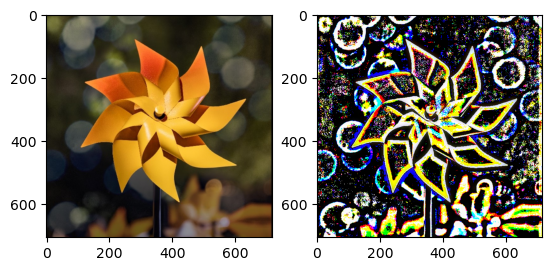

In [4]:
#read an image
image=cv2.imread("flower.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()

#laplacian
output = kornia.filters.laplacian(tensor_image,25)

#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

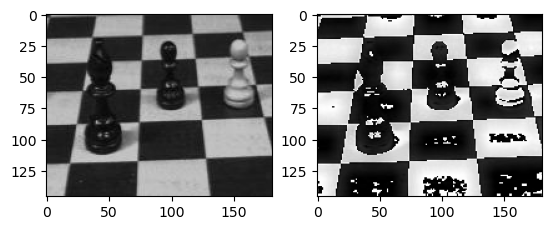

In [9]:
#read an image
image=cv2.imread("sharp1.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()

#laplacian
output = kornia.filters.laplacian(tensor_image,25)

#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

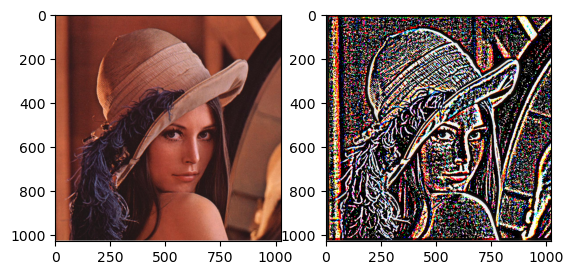

In [4]:
#read an image
image=cv2.imread("Test.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()

#laplacian
output = kornia.filters.laplacian(tensor_image,25)

#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

# Sobel filter

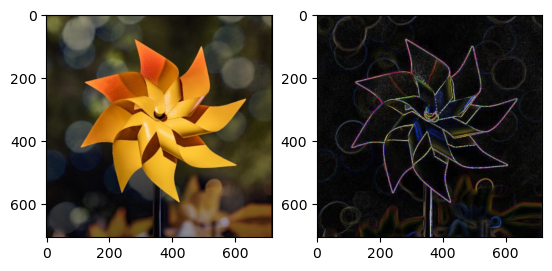

In [16]:
#read an image
image=cv2.imread("flower.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()

#sobel
output = kornia.filters.sobel(tensor_image,False)

#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


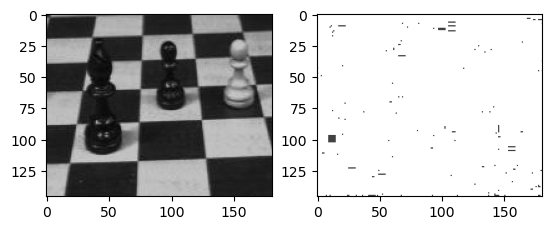

In [19]:
#read an image
image=cv2.imread("sharp1.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.image_to_tensor(img, keepdim=False).float()

#sobel
output = kornia.filters.sobel(tensor_image, False)

#tensor to image
img_blur = kornia.tensor_to_image(output)*255

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)


# Spatial gradient

In [19]:
#read an image
image=cv2.imread("flower.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img).float()/255.0

input_tensor = input_tensor.unsqueeze(0)
if input_tensor.shape[1] != 3:
    input_tensor = input_tensor.permute(0, 3, 1, 2)


#spatial gradient
grads= kornia.filters.spatial_gradient(tensor_image)
# grad_x, grad_y = grads[:, 0], grads[:, 1]

# # Convert the gradients back to NumPy arrays for visualization
# grad_x = grad_x.squeeze().numpy()
# grad_y = grad_y.squeeze().numpy()

# # Plot the gradients
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(np.abs(grad_x), cmap='gray')
# axes[0].set_title('Horizontal Gradient')
# axes[0].axis('off')
# axes[1].imshow(np.abs(grad_y), cmap='gray')
# axes[1].set_title('Vertical Gradient')
# axes[1].axis('off')
# plt.show()


#tensor to image
img_blur = kornia.tensor_to_image(grads)

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 6 is not equal to len(dims) = 4

TypeError: Invalid shape (2, 706, 717) for image data

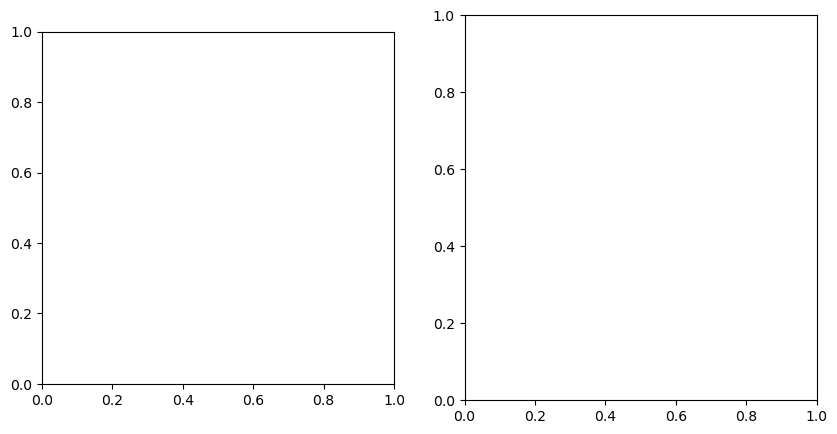

In [1]:
import cv2
import torch
import kornia
import numpy as np
import matplotlib.pyplot as plt

# Load the input image using OpenCV
image = cv2.imread('flower.jpg')  # Replace 'input_image.jpg' with the path to your image

# Convert the image to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to a PyTorch tensor
input_tensor = torch.from_numpy(image.transpose((2, 0, 1)))  # Channels-first format

# Convert the input tensor to the appropriate data type
input_tensor = input_tensor.float()

# Normalize the input tensor
input_tensor = input_tensor / 255.0

# Add a batch dimension
input_tensor = input_tensor.unsqueeze(0)

# Compute spatial gradients using Kornia
grads = kornia.filters.spatial_gradient(input_tensor)


# Separate the horizontal and vertical gradients
grad_x, grad_y = grads[:, 0], grads[:, 1]

# Convert the gradients back to NumPy arrays for visualization
grad_x = grad_x.squeeze().numpy()
grad_y = grad_y.squeeze().numpy()

# Plot the gradients
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.abs(grad_x), cmap='gray')
axes[0].set_title('Horizontal Gradient')
axes[0].axis('off')
axes[1].imshow(np.abs(grad_y), cmap='gray')
axes[1].set_title('Vertical Gradient')
axes[1].axis('off')
plt.show()


Gradient X shape: (2, 706, 717)
Gradient Y shape: (2, 706, 717)


TypeError: Invalid shape (2, 706, 717) for image data

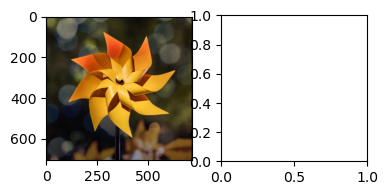

In [14]:
import cv2
import torch
import kornia
import matplotlib.pyplot as plt

# Load the input image using OpenCV
image = cv2.imread('flower.jpg')  # Replace 'input_image.jpg' with the path to your image

# Convert the image to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to a PyTorch tensor
input_tensor = torch.from_numpy(image.transpose((2, 0, 1)))  # Channels-first format

# Convert the input tensor to the appropriate data type
input_tensor = input_tensor.float()

# Normalize the input tensor
input_tensor = input_tensor / 255.0

# Add a batch dimension
input_tensor = input_tensor.unsqueeze(0)

# Ensure the number of channels is 3
if input_tensor.shape[1] != 3:
    input_tensor = input_tensor.permute(0, 3, 1, 2)

# Compute spatial gradients using Kornia
grads = kornia.filters.spatial_gradient(input_tensor)

# Separate the horizontal and vertical gradients
grad_x, grad_y = grads[:, 0], grads[:, 1]
grad_x = grad_x.squeeze().numpy()
grad_y = grad_y.squeeze().numpy()
# Print the shape of the gradients
print("Gradient X shape:", grad_x.shape)
print("Gradient Y shape:", grad_y.shape)

#Plot the gradients
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(grad_x)

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(grad_y)

# Canny

In [26]:
#read an image
image=cv2.imread("t2.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image to tensor
tensor_image=kornia.utils.image_to_tensor(img, keepdim=False).float()/255.

#spatial gradient
magnitude, edges = kornia.filters.Canny(tensor_image)

#tensor to image
img_blur1 = kornia.tensor_to_image(magnitude.byte())
img_blur2 = kornia.tensor_to_image(edges.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur1)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

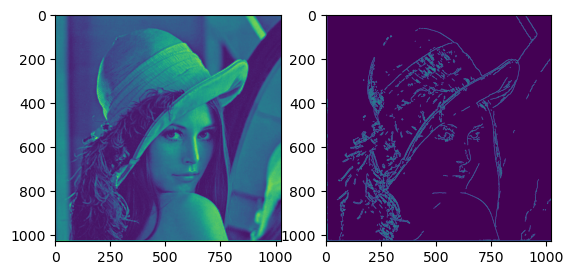

In [29]:
image=cv2.imread("test.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
output=cv2.Canny(img, 80, 120)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(output)